In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(5)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.pop(df.columns[0])
df.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


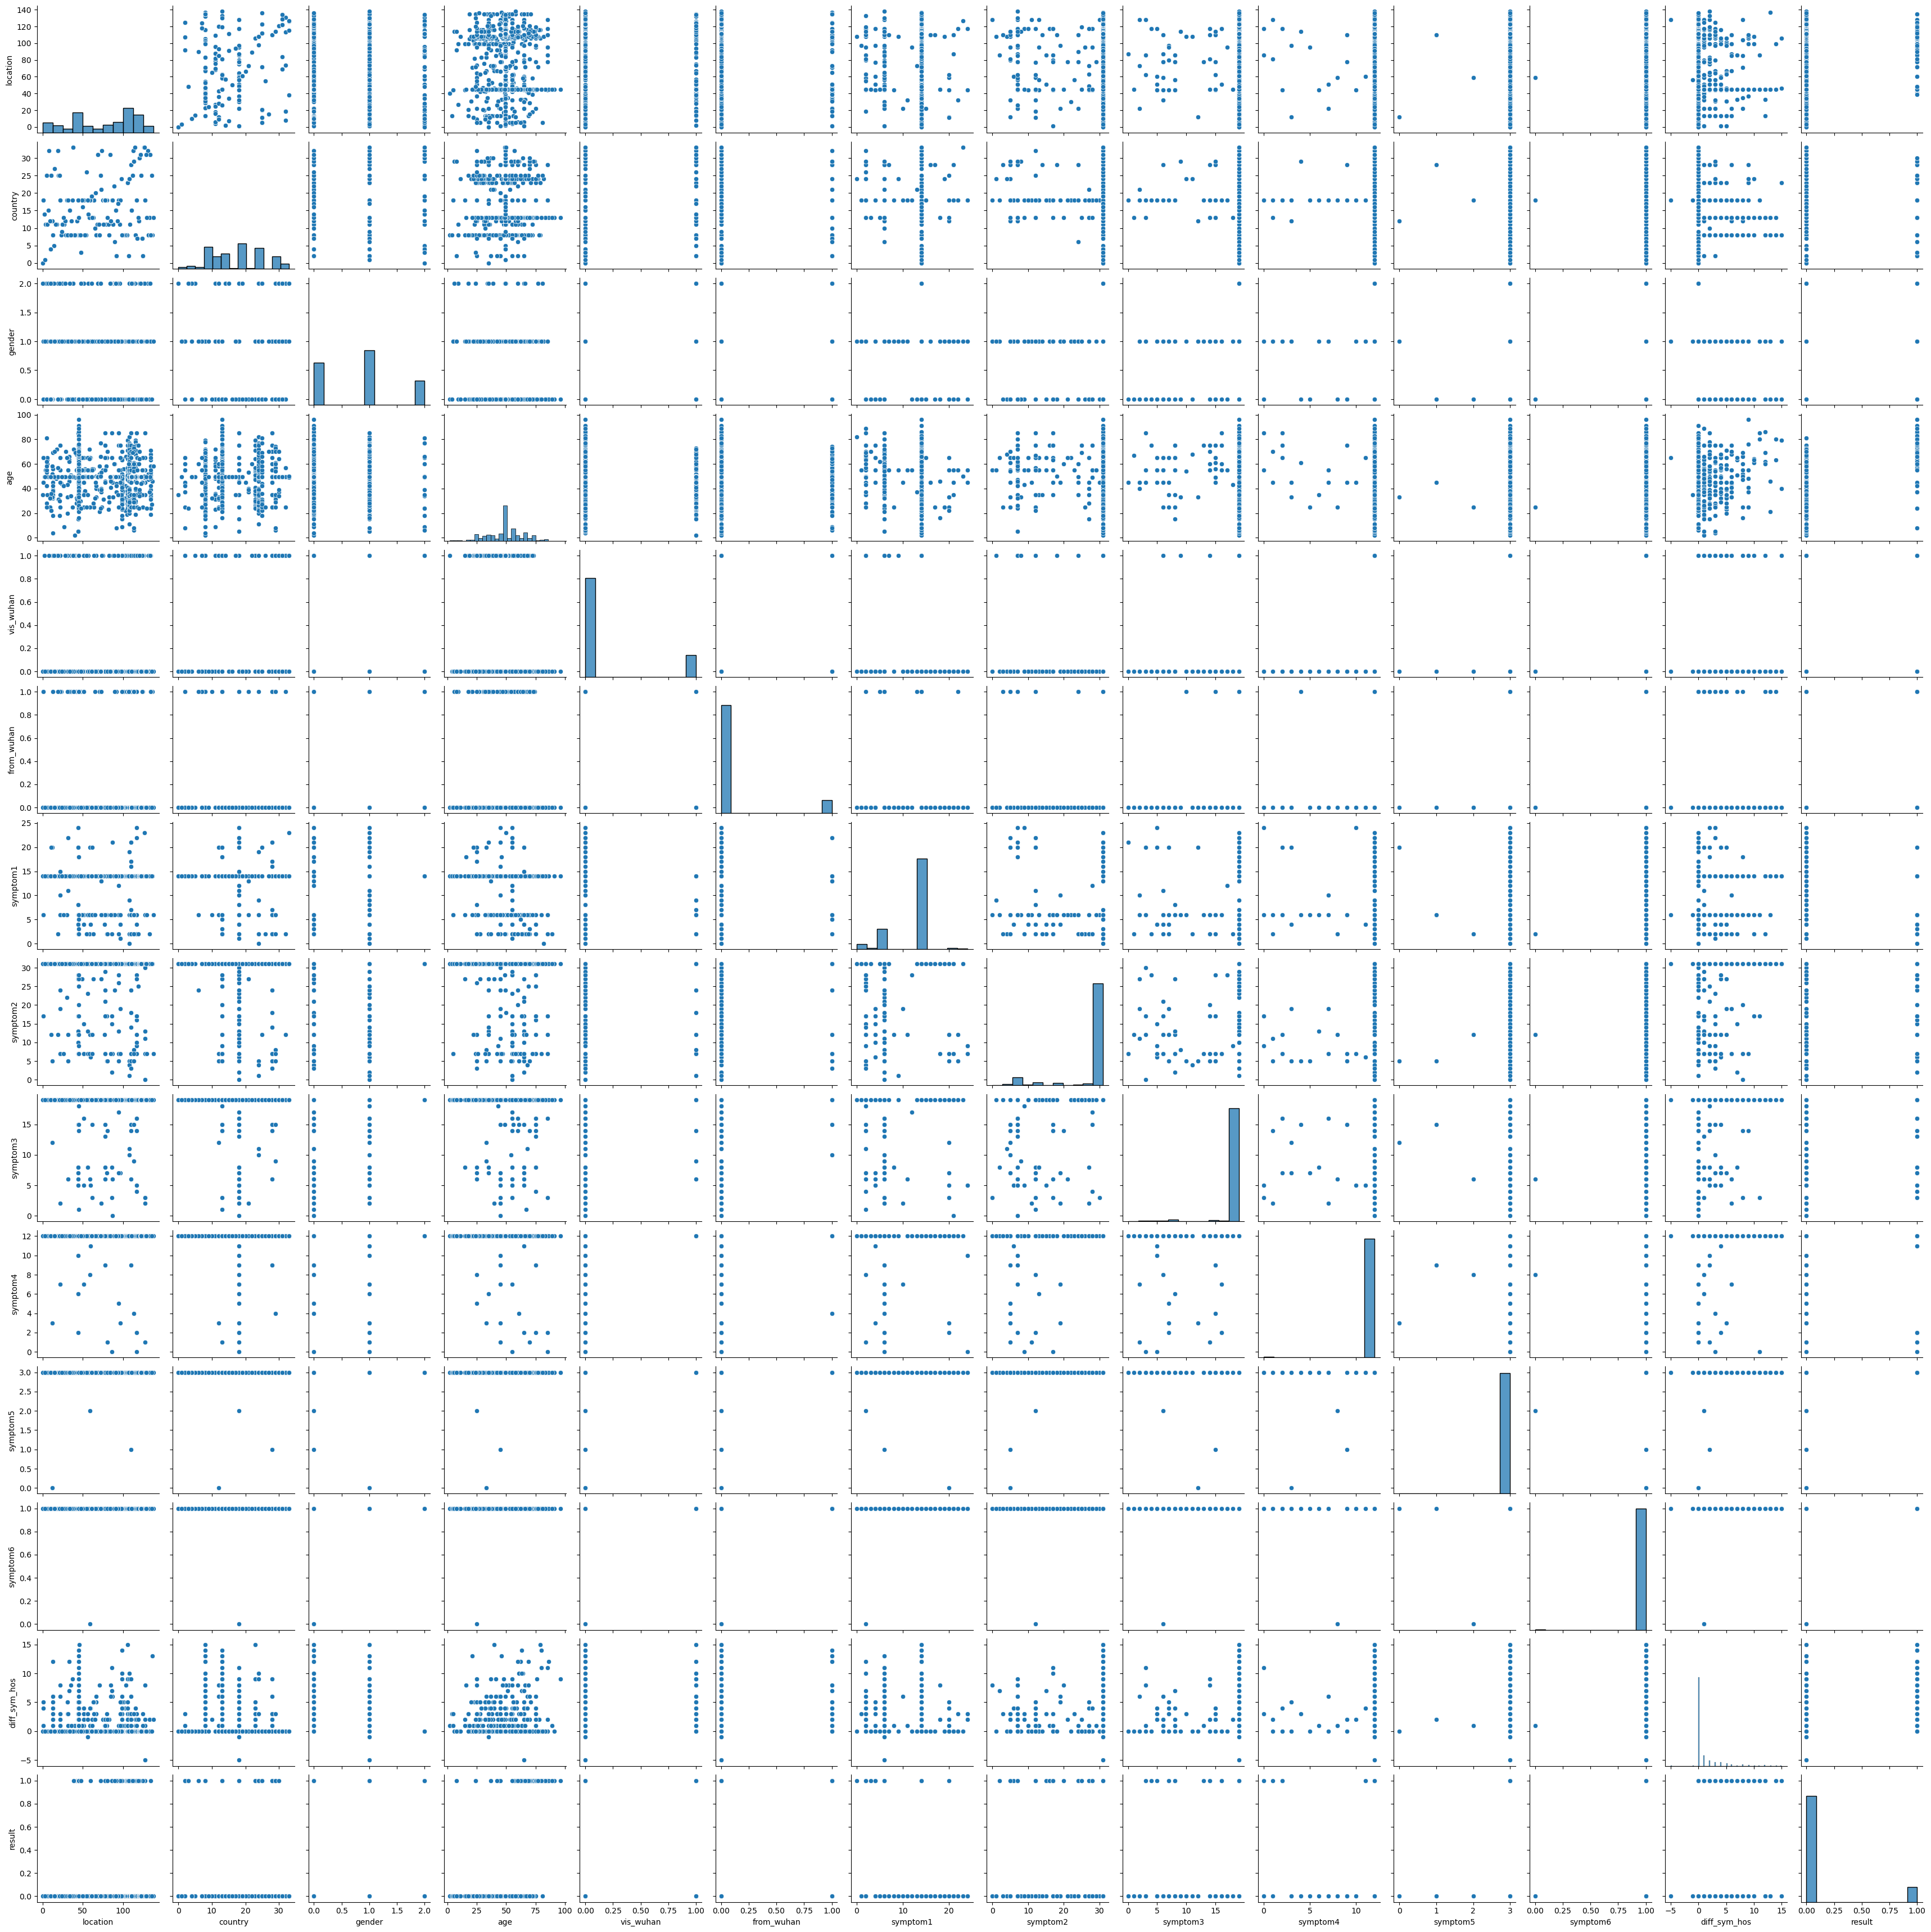

In [5]:
sns.pairplot(df)

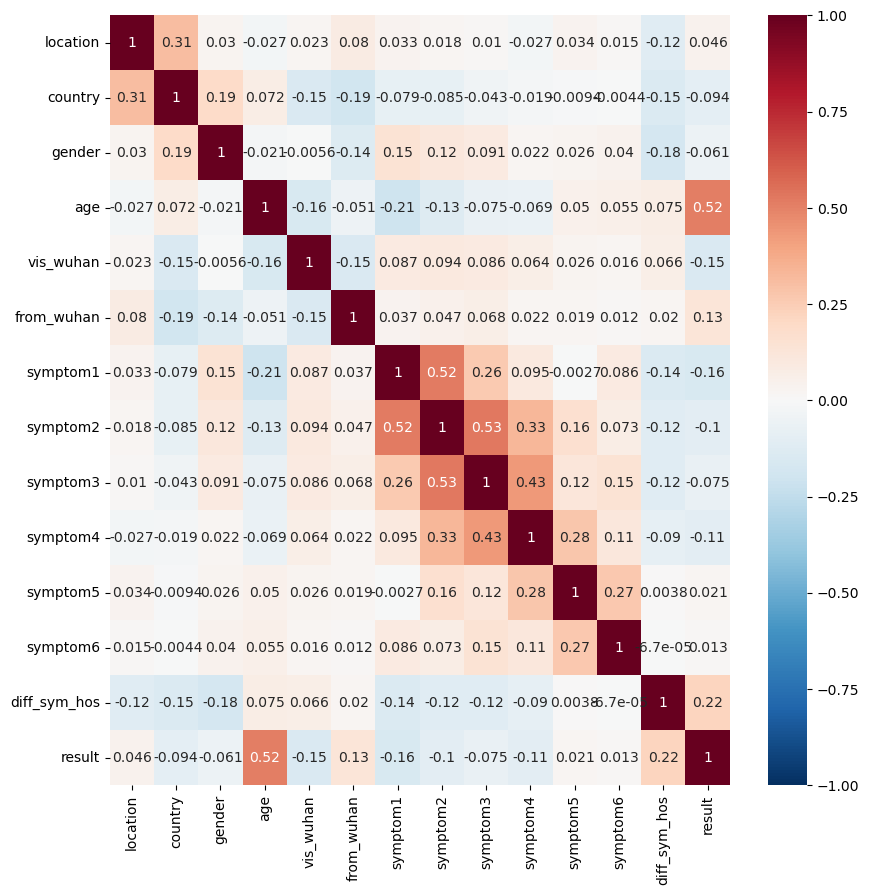

In [6]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [7]:
df.drop(['location', 'country'], axis=1, inplace=True)
df.head(5)

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,1,66.0,1,0,14,31,19,12,3,1,8,1
1,0,56.0,0,1,14,31,19,12,3,1,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0


In [8]:
df.describe()

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [9]:
df["age"] = df["age"].astype(int)

In [10]:
df_col=df.columns
df_col

Index(['gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2',
       'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos',
       'result'],
      dtype='object')

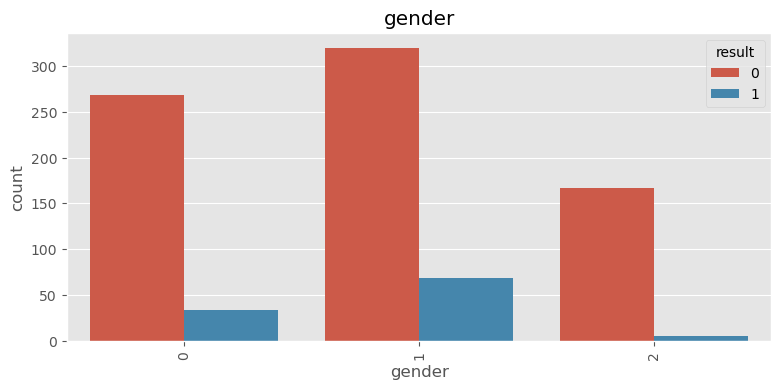

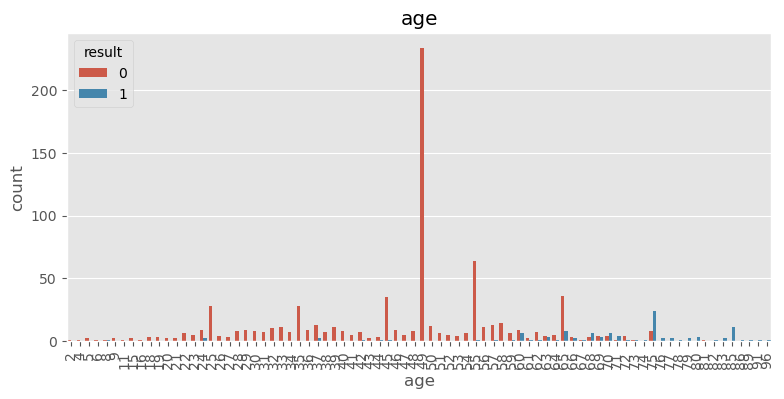

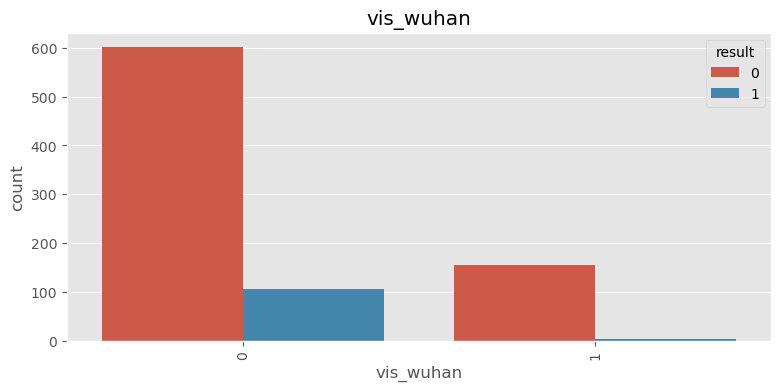

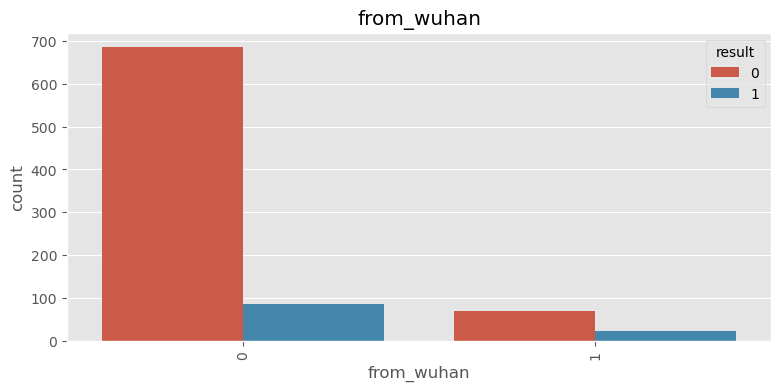

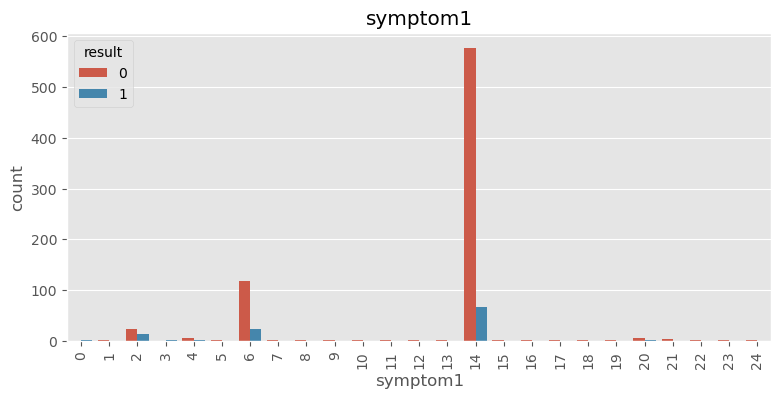

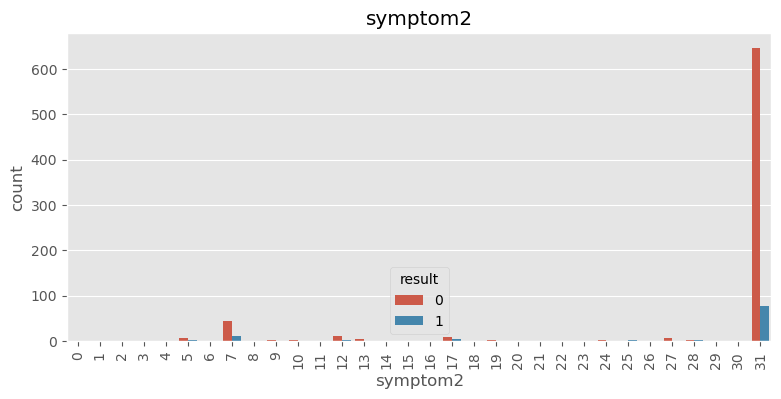

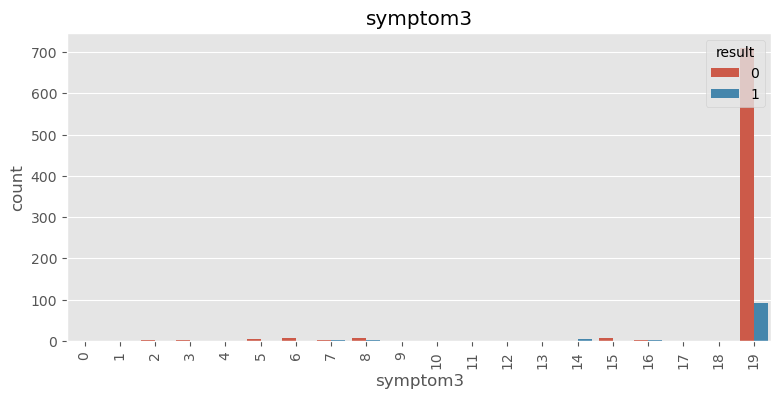

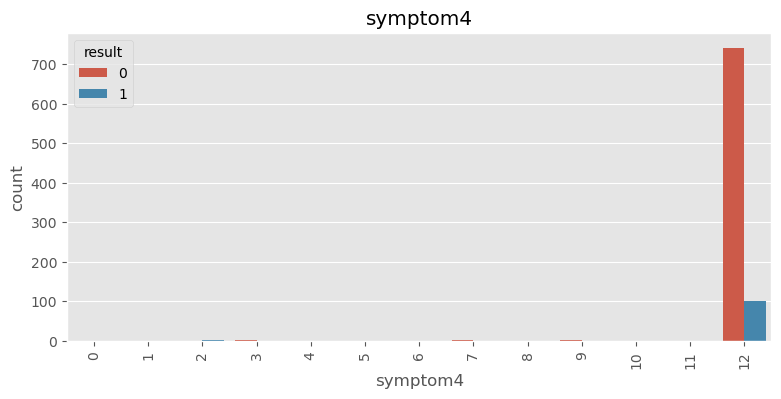

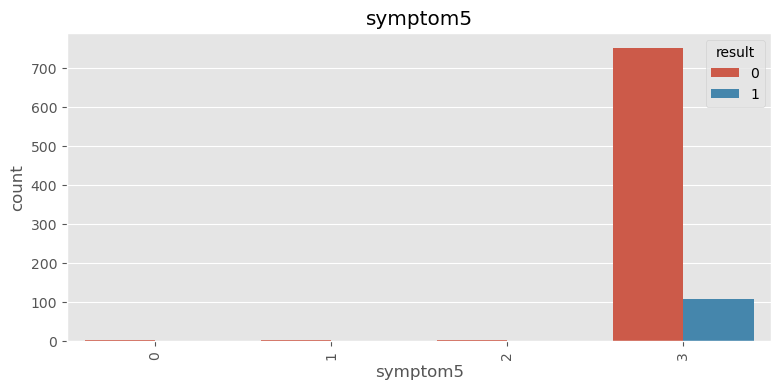

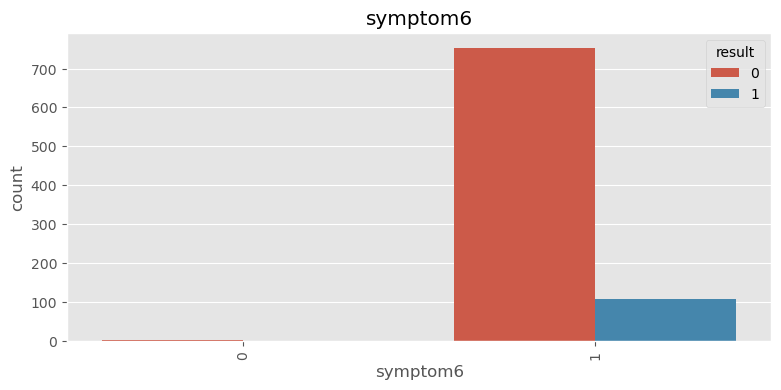

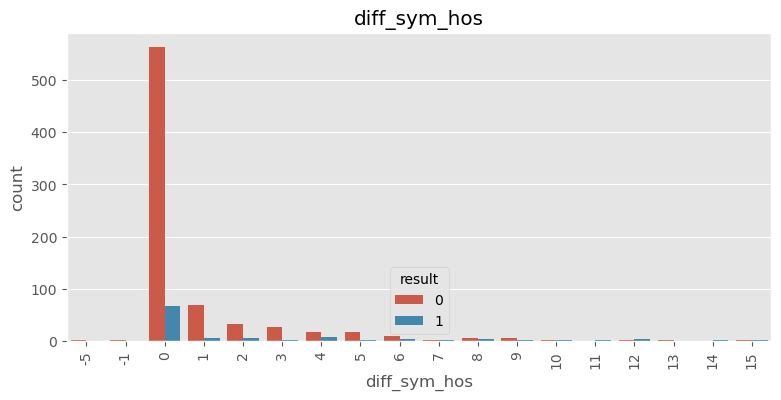

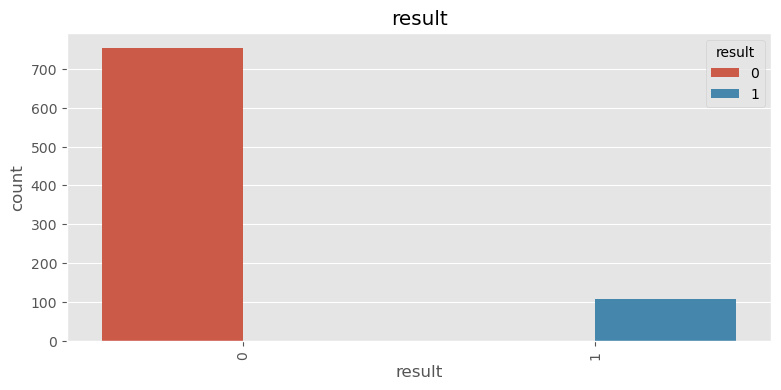

In [11]:
plt.style.use("ggplot")
for column in df_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["result"])
    plt.title(column)    
    plt.xticks(rotation=90)

In [12]:
# Train Test Split
y = df['result']
X = df.drop('result', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)

(690, 11)
(173, 11)


# hyperparameters optimization

In [13]:
names = [
         "K-Nearest Neighbors",
         "Logistic Regression",
         "Naïve Bayes",
         "Decision Trees",
         "Support Vector Machines"
        ]

clf1 = KNeighborsClassifier()
clf2 = LogisticRegression(random_state=42)
clf3 = ComplementNB()
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = SVC(probability=True, random_state=42)

param1 = {}
param1['n_neighbors'] = [2,5,15,25,50]

param2 = {}
param2['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['penalty'] = ['l1', 'l2']

param3 = {}
param3['alpha'] = [10**0, 10**1, 10**2]

param4 = {}
param4['max_depth'] = [5,10,25,None]
param4['min_samples_split'] = [2,5,15]

param5 = {}
param5['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param5['kernel'] = ['linear', 'poly','rbf', 'sigmoid']

## K-Nearest Neighbors


In [14]:
gs_knn = GridSearchCV(clf1, param1, cv=3,scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for K-Nearest Neighbors " )
gs_knn.best_params_

Best parameter for K-Nearest Neighbors 


{'n_neighbors': 25}

In [15]:
print('accuracy: {}'.format(accuracy_score(gs_knn.predict(X_test),y_test)))
print('precision: {}'.format(precision_score(gs_knn.predict(X_test),y_test)))
print('recall: {}'.format(recall_score(gs_knn.predict(X_test),y_test)))
print('fscore: {}'.format(f1_score(gs_knn.predict(X_test),y_test)))

accuracy: 0.9132947976878613
precision: 0.4090909090909091
recall: 0.8181818181818182
fscore: 0.5454545454545455


## Logistic Regression

In [16]:
gs_lr = GridSearchCV(clf2, param2, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Logistic Regression" )
gs_lr.best_params_

Best parameter for Logistic Regression


{'C': 100, 'penalty': 'l2'}

In [17]:
print('accuracy: {}'.format(accuracy_score(gs_lr.predict(X_test),y_test)))
print('precision: {}'.format(precision_score(gs_lr.predict(X_test),y_test)))
print('recall: {}'.format(recall_score(gs_lr.predict(X_test),y_test)))
print('fscore: {}'.format(f1_score(gs_lr.predict(X_test),y_test)))

accuracy: 0.930635838150289
precision: 0.6363636363636364
recall: 0.7777777777777778
fscore: 0.7000000000000001


## Naïve Bayes

In [18]:
scaler = MinMaxScaler()
X_trainx = scaler.fit_transform(X_train)
X_testx = scaler.fit_transform(X_test)

In [19]:
gs_nb = GridSearchCV(clf3, param3, cv=3, scoring='roc_auc').fit(X_trainx, y_train)
print("Best parameter for Naïve Bayes" )
gs_nb.best_params_

Best parameter for Naïve Bayes


{'alpha': 10}

In [20]:
print('accuracy: {}'.format(accuracy_score(gs_nb.predict(X_testx),y_test)))
print('precision: {}'.format(precision_score(gs_nb.predict(X_testx),y_test)))
print('recall: {}'.format(recall_score(gs_nb.predict(X_testx),y_test)))
print('fscore: {}'.format(f1_score(gs_nb.predict(X_testx),y_test)))

accuracy: 0.791907514450867
precision: 0.9545454545454546
recall: 0.375
fscore: 0.5384615384615384


## Decision Trees

In [21]:
gs_dt = GridSearchCV(clf4, param4, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Decision Trees" )
gs_dt.best_params_

Best parameter for Decision Trees


{'max_depth': 5, 'min_samples_split': 15}

In [22]:
print('accuracy: {}'.format(accuracy_score(gs_dt.predict(X_test),y_test)))
print('precision: {}'.format(precision_score(gs_dt.predict(X_test),y_test)))
print('recall: {}'.format(recall_score(gs_dt.predict(X_test),y_test)))
print('fscore: {}'.format(f1_score(gs_dt.predict(X_test),y_test)))

accuracy: 0.9653179190751445
precision: 0.9090909090909091
recall: 0.8333333333333334
fscore: 0.8695652173913043


## Support Vector Machines

In [23]:
gs_sv = GridSearchCV(clf5, param5, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for SVM" )
gs_sv.best_params_

Best parameter for SVM


{'C': 100, 'kernel': 'poly'}

In [24]:
print('accuracy: {}'.format(accuracy_score(gs_sv.predict(X_test),y_test)))
print('precision: {}'.format(precision_score(gs_sv.predict(X_test),y_test)))
print('recall: {}'.format(recall_score(gs_sv.predict(X_test),y_test)))
print('fscore: {}'.format(f1_score(gs_sv.predict(X_test),y_test)))

accuracy: 0.9653179190751445
precision: 0.8636363636363636
recall: 0.8636363636363636
fscore: 0.8636363636363636


# Compare the performance of all classifiers

In [25]:
classifiers = [gs_knn, 
               gs_lr, 
               gs_nb, 
               gs_dt,
               gs_sv]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
i=0
for cls in classifiers:
    if(cls!=gs_nb):
        yproba = cls.predict_proba(X_test)[::,1]
    else:
        yproba = cls.predict_proba(X_testx)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
        
    result_table = result_table.append({'classifiers':names[i],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    i+=1
result_table.set_index('classifiers', inplace=True)


In [26]:
roc_auc_score(gs_knn.predict(X_test),y_test)

0.8689674523007858

In [27]:
result_table

,fpr,tpr,auc
classifiers,,,
K-Nearest Neighbors,"[0.0, 0.0, 0.0, 0.0, 0.013245033112582781, 0.0...","[0.0, 0.045454545454545456, 0.1363636363636363...",0.951987
Logistic Regression,"[0.0, 0.0, 0.0, 0.006622516556291391, 0.006622...","[0.0, 0.045454545454545456, 0.2727272727272727...",0.982842
Naïve Bayes,"[0.0, 0.0, 0.026490066225165563, 0.02649006622...","[0.0, 0.045454545454545456, 0.0454545454545454...",0.897050
Decision Trees,"[0.0, 0.006622516556291391, 0.0132450331125827...","[0.0, 0.0, 0.45454545454545453, 0.727272727272...",0.955599
Support Vector Machines,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.006622516556291391...","[0.0, 0.045454545454545456, 0.3181818181818182...",0.993377


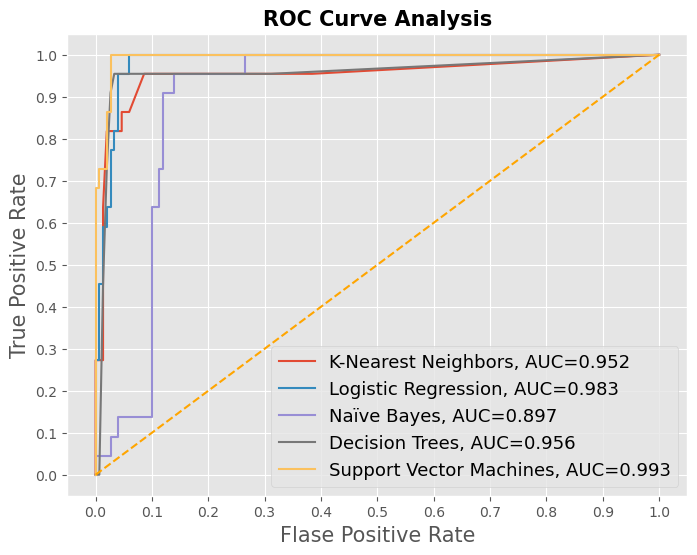

In [28]:
fig = plt.figure(figsize=(8,6))
for i in names:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()